#📌 Extracción

In [1]:
import pandas as pd
import requests

# URL directa al contenido raw del archivo JSON
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# 1. Cargar los datos desde la API
response = requests.get(url)

# 2. Verificar estatus y convertir a DataFrame
if response.status_code == 200:
    data = response.json()
    # Usamos json_normalize porque los datos tienen estructura anidada (customer, phone, etc.)
    df = pd.json_normalize(data)

    # Mostrar las primeras filas
    print("Datos cargados exitosamente:")
    print(df.head())
else:
    print(f"Error al cargar los datos: {response.status_code}")

Datos cargados exitosamente:
   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  i

#🔧 Transformación

In [3]:
# Convertir a numérico, forzando los espacios en blanco a NaN (nulos)
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [4]:
# 1. Ver todas las columnas, cantidad de datos no nulos y sus tipos (Dtypes)
print("--- Información General del Dataset ---")
df.info()

# 2. Ver un resumen estadístico de las variables numéricas (promedios, mínimos, máximos)
print("\n--- Resumen Estadístico ---")
print(df.describe())

# 3. Revisar los primeros registros para entender el formato de los valores
df.head()

--- Información General del Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [5]:
print(df['Churn'].value_counts(normalize=True) * 100)

Churn
No     71.198569
Yes    25.719004
        3.082427
Name: proportion, dtype: float64


In [6]:
# --- 1. SOLUCIONAR INCONSISTENCIAS EN EL CHURN ---
# Filtramos el DataFrame para quedarnos solo con filas que sí tengan 'Yes' o 'No'
df = df[df['Churn'] != '']
print(f"Filas tras limpiar el Churn: {df.shape[0]}")

# --- 2. ARREGLAR FORMATO Y VALORES AUSENTES EN CHARGES.TOTAL ---
# 'coerce' convierte forzosamente los espacios " " en verdaderos nulos (NaN)
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# Como sabemos que esos nulos pertenecen a clientes que acaban de llegar (tenure=0),
# reemplazamos esos NaN lógicamente por 0.0
df['account.Charges.Total'] = df['account.Charges.Total'].fillna(0)

# --- 3. ESTANDARIZAR CATEGORÍAS (Limpiar redundancias) ---
# Lista de columnas con la categoría 'No internet service'
internet_cols = ['internet.OnlineSecurity', 'internet.OnlineBackup',
                 'internet.DeviceProtection', 'internet.TechSupport',
                 'internet.StreamingTV', 'internet.StreamingMovies']

# Reemplazamos 'No internet service' por 'No'
for col in internet_cols:
    df[col] = df[col].replace('No internet service', 'No')

# Hacemos lo mismo para el servicio telefónico
df['phone.MultipleLines'] = df['phone.MultipleLines'].replace('No phone service', 'No')

# --- 4. VERIFICACIÓN FINAL ---
print("\nVerificación de tipos de datos corregidos:")
print(df[['Churn', 'account.Charges.Total', 'internet.TechSupport']].info())

Filas tras limpiar el Churn: 7043

Verificación de tipos de datos corregidos:
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Churn                  7043 non-null   object 
 1   account.Charges.Total  7043 non-null   float64
 2   internet.TechSupport   7043 non-null   object 
dtypes: float64(1), object(2)
memory usage: 220.1+ KB
None


/tmp/ipython-input-488/3262079905.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
/tmp/ipython-input-488/3262079905.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['account.Charges.Total'] = df['account.Charges.Total'].fillna(0)
/tmp/ipython-input-488/3262079905.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [7]:
# INGENIERÍA DE CARACTERÍSTICAS (Feature Engineering)
# Crear la nueva columna de facturación diaria
# Asumimos un mes estándar de 30 días y redondeamos a 2 decimales por estética
df['Cuentas_Diarias'] = (df['account.Charges.Monthly'] / 30).round(2)

/tmp/ipython-input-488/1190230065.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cuentas_Diarias'] = (df['account.Charges.Monthly'] / 30).round(2)


In [9]:
# Definimos un diccionario con los nombres actuales y los nuevos nombres en español
columnas_espanol = {
    'customerID': 'ID_Cliente',
    'Churn': 'Fuga',
    'customer.gender': 'Genero',
    'customer.SeniorCitizen': 'Adulto_Mayor',
    'customer.Partner': 'Pareja',
    'customer.Dependents': 'Dependientes',
    'customer.tenure': 'Meses_Contrato',
    'phone.PhoneService': 'Servicio_Telefonico',
    'phone.MultipleLines': 'Multiples_Lineas',
    'internet.InternetService': 'Servicio_Internet',
    'internet.OnlineSecurity': 'Seguridad_Online',
    'internet.OnlineBackup': 'Respaldo_Online',
    'internet.DeviceProtection': 'Proteccion_Dispositivo',
    'internet.TechSupport': 'Soporte_Tecnico',
    'internet.StreamingTV': 'Streaming_TV',
    'internet.StreamingMovies': 'Streaming_Peliculas',
    'account.Contract': 'Contrato',
    'account.PaperlessBilling': 'Facturacion_Electronica',
    'account.PaymentMethod': 'Metodo_Pago',
    'account.Charges.Monthly': 'Cargo_Mensual',
    'account.Charges.Total': 'Cargo_Total'
    # 'Cuentas_Diarias' ya está en español, así que la dejamos igual
}

# Aplicamos el renombramiento al DataFrame
df = df.rename(columns=columnas_espanol)

In [10]:
# --- CONVERSIÓN BINARIA (Yes/No a 1/0) ---
# Lista de columnas que contienen respuestas de Sí/No
columnas_binarias = [
    'Fuga', 'Pareja', 'Dependientes', 'Servicio_Telefonico',
    'Multiples_Lineas', 'Seguridad_Online', 'Respaldo_Online',
    'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV',
    'Streaming_Peliculas', 'Facturacion_Electronica'
]

# Mapeamos 'Yes' a 1 y 'No' a 0
for col in columnas_binarias:
    df[col] = df[col].map({'Yes': 1, 'No': 0})


# --- TRADUCCIÓN DE CATEGORÍAS ---
# Traducimos Género
df['Genero'] = df['Genero'].map({'Female': 'Femenino', 'Male': 'Masculino'})

# Traducimos Tipo de Contrato
df['Contrato'] = df['Contrato'].map({
    'Month-to-month': 'Mensual',
    'One year': '1 Año',
    'Two year': '2 Años'
})

# Traducimos Servicio de Internet
df['Servicio_Internet'] = df['Servicio_Internet'].map({
    'DSL': 'DSL',
    'Fiber optic': 'Fibra Optica',
    'No': 'Ninguno'
})

# Revisamos cómo quedó nuestra obra de arte
print(df[['ID_Cliente', 'Fuga', 'Genero', 'Contrato', 'Cargo_Mensual']].head())

   ID_Cliente  Fuga     Genero Contrato  Cargo_Mensual
0  0002-ORFBO     0   Femenino    1 Año           65.6
1  0003-MKNFE     0  Masculino  Mensual           59.9
2  0004-TLHLJ     1  Masculino  Mensual           73.9
3  0011-IGKFF     1  Masculino  Mensual           98.0
4  0013-EXCHZ     1   Femenino  Mensual           83.9


#📊 Carga y análisis

In [11]:
# 1. Seleccionamos las principales variables numéricas del negocio
variables_numericas = ['Meses_Contrato', 'Cargo_Mensual', 'Cargo_Total', 'Cuentas_Diarias']

# 2. Generamos el análisis descriptivo
resumen_estadistico = df[variables_numericas].describe().round(2)

# Mostrar el resultado
resumen_estadistico

,Meses_Contrato,Cargo_Mensual,Cargo_Total,Cuentas_Diarias
count,7043.00,7043.00,7043.00,7043.00
mean,32.37,64.76,2279.73,2.16
std,24.56,30.09,2266.79,1.00
min,0.00,18.25,0.00,0.61
25%,9.00,35.50,398.55,1.18
50%,29.00,70.35,1394.55,2.34
75%,55.00,89.85,3786.60,2.99
max,72.00,118.75,8684.80,3.96


In [12]:
# Comparamos el comportamiento promedio entre los clientes que se quedaron (0) y los que se fugaron (1)
analisis_fuga = df.groupby('Fuga')[variables_numericas].mean().round(2)
analisis_fuga

,Meses_Contrato,Cargo_Mensual,Cargo_Total,Cuentas_Diarias
Fuga,,,,
0,37.57,61.27,2549.91,2.04
1,17.98,74.44,1531.80,2.48


/tmp/ipython-input-488/881289557.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Fuga', ax=axes[0], palette=['#2ECC71', '#E74C3C'])


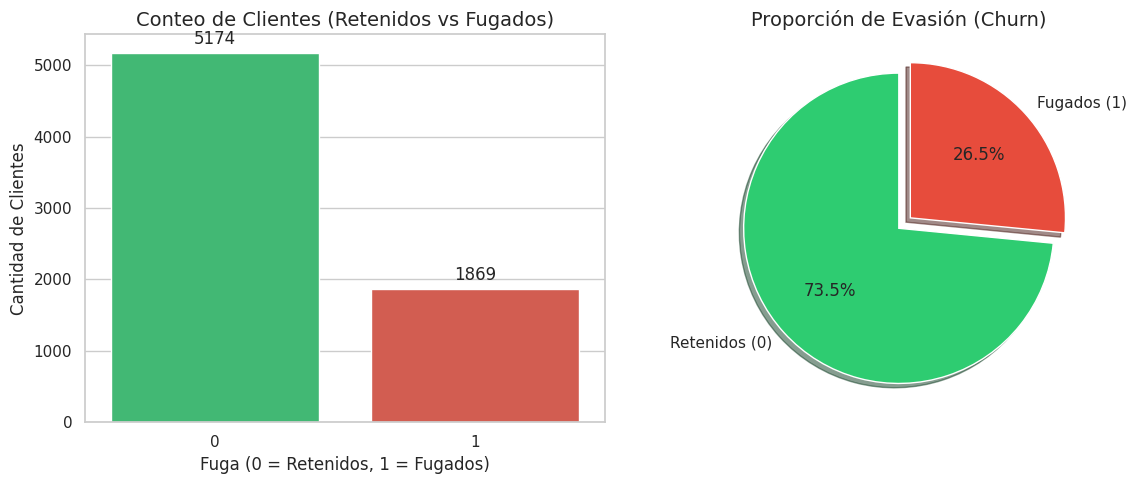

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo visual para que se vea más profesional
sns.set_theme(style="whitegrid")

# Crear un lienzo para nuestras dos gráficas (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 1. Gráfico de barras (Conteo absoluto)
sns.countplot(data=df, x='Fuga', ax=axes[0], palette=['#2ECC71', '#E74C3C'])
axes[0].set_title('Conteo de Clientes (Retenidos vs Fugados)', fontsize=14)
axes[0].set_xlabel('Fuga (0 = Retenidos, 1 = Fugados)', fontsize=12)
axes[0].set_ylabel('Cantidad de Clientes', fontsize=12)

# Añadir el número exacto sobre cada barra
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# 2. Gráfico de pastel (Proporción porcentual)
churn_counts = df['Fuga'].value_counts()
axes[1].pie(churn_counts, labels=['Retenidos (0)', 'Fugados (1)'], autopct='%1.1f%%',
            colors=['#2ECC71', '#E74C3C'], startangle=90, explode=(0, 0.1), shadow=True)
axes[1].set_title('Proporción de Evasión (Churn)', fontsize=14)

# Ajustar el diseño y mostrar la gráfica
plt.tight_layout()
plt.show()

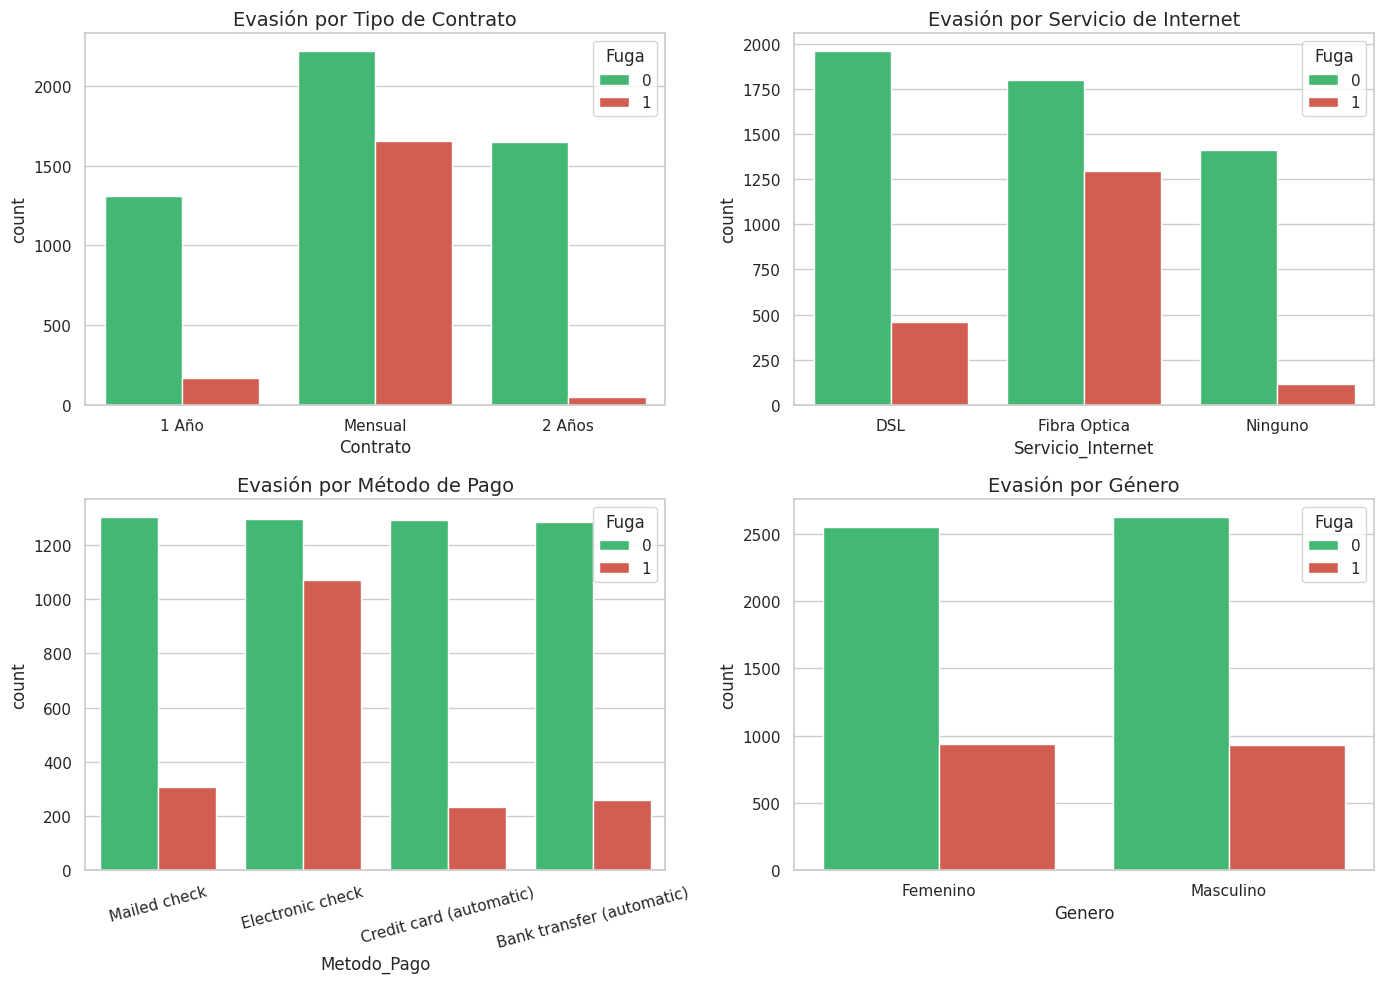

In [14]:
# Crear una figura 2x2 para acomodar 4 gráficos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Definimos los colores: Verde (0=Retenido), Rojo (1=Fugado)
colores = ['#2ECC71', '#E74C3C']

# 1. Evasión por Tipo de Contrato
sns.countplot(data=df, x='Contrato', hue='Fuga', ax=axes[0, 0], palette=colores)
axes[0, 0].set_title('Evasión por Tipo de Contrato', fontsize=14)

# 2. Evasión por Servicio de Internet
sns.countplot(data=df, x='Servicio_Internet', hue='Fuga', ax=axes[0, 1], palette=colores)
axes[0, 1].set_title('Evasión por Servicio de Internet', fontsize=14)

# 3. Evasión por Método de Pago
sns.countplot(data=df, x='Metodo_Pago', hue='Fuga', ax=axes[1, 0], palette=colores)
axes[1, 0].set_title('Evasión por Método de Pago', fontsize=14)
axes[1, 0].tick_params(axis='x', rotation=15) # Inclinamos el texto para que se lea bien

# 4. Evasión por Género
sns.countplot(data=df, x='Genero', hue='Fuga', ax=axes[1, 1], palette=colores)
axes[1, 1].set_title('Evasión por Género', fontsize=14)

# Ajustamos el espaciado para que no se empalmen los títulos
plt.tight_layout()
plt.show()

El peligro del Contrato Mensual:

El 42.7% de los clientes con contrato "Mensual" terminan abandonando el servicio. En contraste, aquellos que firman contratos a 2 años tienen una tasa de fuga casi nula (2.8%). Acción estratégica sugerida: Ofrecer descuentos agresivos o beneficios extra para que los clientes pasen de contrato mensual a anual.

Problemas con el Cheque Electrónico:

¡Casi la mitad (45.3%) de las personas que pagan con "Cheque Electrónico" cancelan el servicio! Los que usan pagos automáticos (tarjeta de crédito o transferencia) son los más fieles (fuga del ~15%). Acción estratégica sugerida: Investigar la plataforma de pagos electrónicos de la empresa; podría estar fallando o siendo muy confusa, lo que frustra al cliente.

El caso de la Fibra Óptica:

Paradójicamente, el servicio de "Fibra Óptica" (que suele ser el premium y más rápido) tiene una fuga brutal del 41.9%, mientras que el internet "DSL" (más antiguo y lento) solo tiene un 19% de fuga. Hipótesis: O la fibra óptica de TelecomX está fallando mucho y tiene intermitencias, o es demasiado cara para el valor que percibe el cliente.

El Género no importa:

Si observas el gráfico de género, las barras para Femenino y Masculino son casi idénticas. Esto nos dice que el género no es una variable relevante para predecir si alguien se irá o se quedará.

/tmp/ipython-input-488/4081319362.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Etiqueta_Fuga', y='Meses_Contrato', ax=axes[0, 0], palette=colores)
/tmp/ipython-input-488/4081319362.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Etiqueta_Fuga', y='Cargo_Mensual', ax=axes[0, 1], palette=colores)
/tmp/ipython-input-488/4081319362.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Etiqueta_Fuga', y='Cargo_Total', ax=axes[1, 0], palette=colores)
/tmp/ipython-input-488/4081319362.py:27: FutureWarn

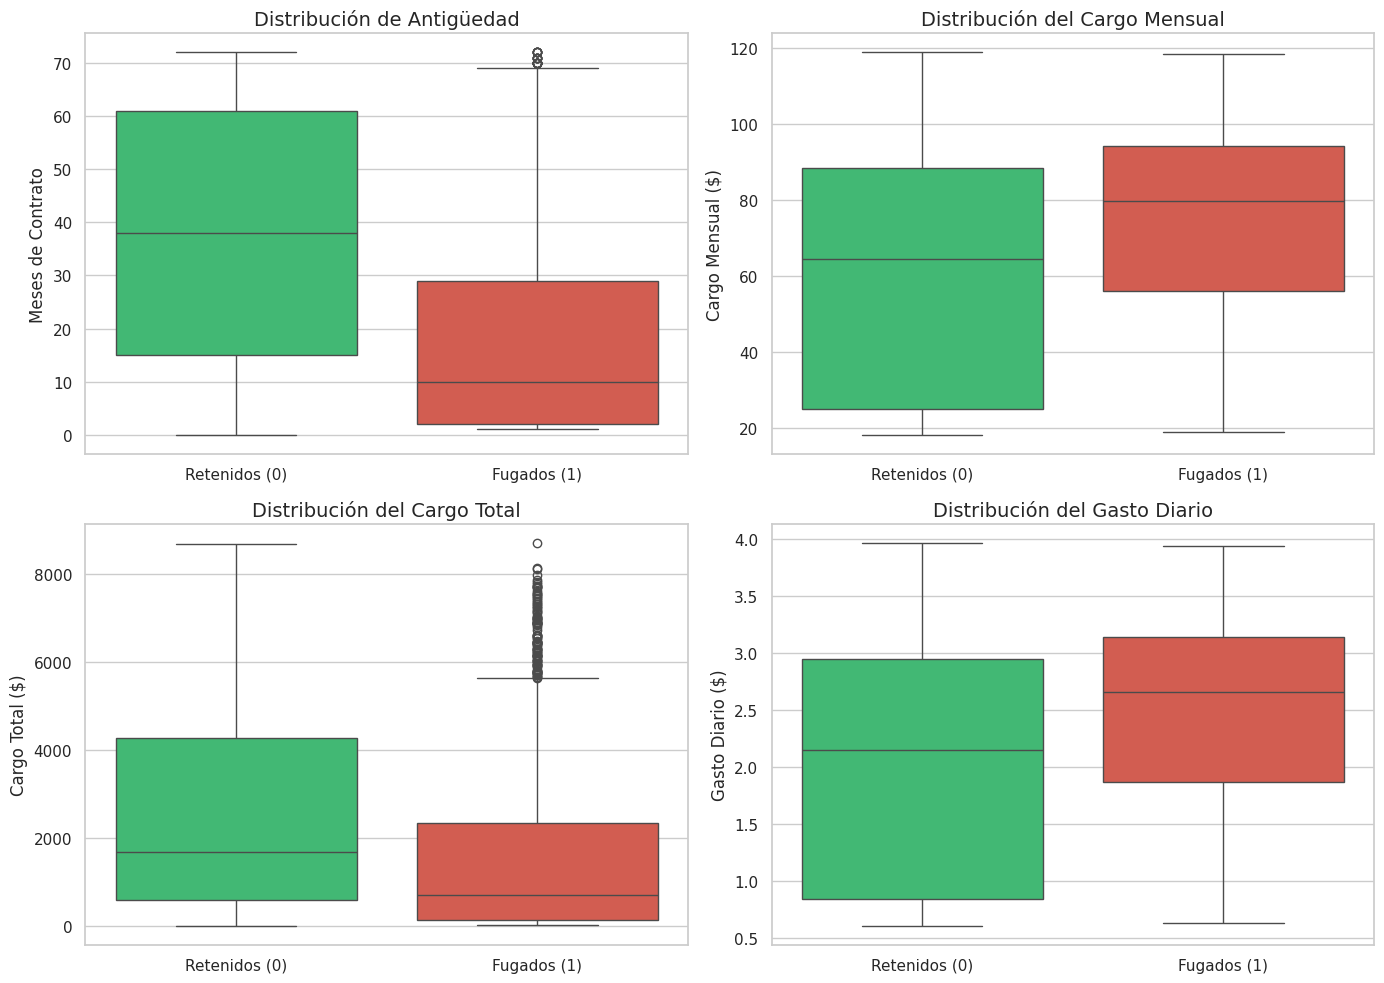

In [15]:
# Configurar la visualización
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Mapeo temporal para etiquetas más claras en los gráficos
df['Etiqueta_Fuga'] = df['Fuga'].map({0: 'Retenidos (0)', 1: 'Fugados (1)'})
colores = {'Retenidos (0)': '#2ECC71', 'Fugados (1)': '#E74C3C'}

# 1. Antigüedad (Meses de Contrato)
sns.boxplot(data=df, x='Etiqueta_Fuga', y='Meses_Contrato', ax=axes[0, 0], palette=colores)
axes[0, 0].set_title('Distribución de Antigüedad', fontsize=14)
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Meses de Contrato')

# 2. Cargo Mensual
sns.boxplot(data=df, x='Etiqueta_Fuga', y='Cargo_Mensual', ax=axes[0, 1], palette=colores)
axes[0, 1].set_title('Distribución del Cargo Mensual', fontsize=14)
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('Cargo Mensual ($)')

# 3. Cargo Total
sns.boxplot(data=df, x='Etiqueta_Fuga', y='Cargo_Total', ax=axes[1, 0], palette=colores)
axes[1, 0].set_title('Distribución del Cargo Total', fontsize=14)
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('Cargo Total ($)')

# 4. Gasto Diario (Cuentas Diarias)
sns.boxplot(data=df, x='Etiqueta_Fuga', y='Cuentas_Diarias', ax=axes[1, 1], palette=colores)
axes[1, 1].set_title('Distribución del Gasto Diario', fontsize=14)
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('Gasto Diario ($)')

# Ajustar y mostrar
plt.tight_layout()
plt.show()

# Opcional: Eliminar la columna de etiquetas temporales para mantener tu DF limpio
df = df.drop(columns=['Etiqueta_Fuga'])

Antigüedad Crítica (Meses_Contrato):

El Insight: La caja roja (Fugados) está fuertemente aplastada hacia abajo. La mediana es de apenas 10 meses para los que cancelan, mientras que los que se quedan tienen una mediana de 38 meses.

La Conclusión: El riesgo de fuga es más alto durante el primer año de servicio. Si logras que un cliente pase la barrera de los 10 meses, es altamente probable que se quede a largo plazo.

Sensibilidad al Precio (Cargo_Mensual y Cuentas_Diarias):

El Insight: La mediana del cargo mensual para los que abandonan es 79.65, comparada con los 64.42 de los que se quedan.

La Conclusión: TelecomX está perdiendo a sus clientes más rentables (los que pagan más). Esto sugiere que los clientes con planes premium o múltiples servicios no están percibiendo un buen retorno de valor por el alto precio que pagan mensualmente.

Cargo Total (Una métrica engañosa):

Verás que el Cargo_Total de los que se van es mucho menor al de los retenidos (703 vs 1679). ¡No te dejes engañar por este número! Esto no significa que los que se van gasten menos por ser "baratos"; simplemente significa que se van rápido (a los 10 meses), por lo que no alcanzan a acumular un gasto total alto en la compañía.

#📄Informe final

Informe Final: Análisis de Evasión de Clientes (Churn) - Telecom X
Introducción
El presente proyecto tiene como objetivo analizar el comportamiento de los clientes de Telecom X para identificar los principales factores que influyen en la evasión o cancelación del servicio (Churn). Comprender el perfil de los clientes que abandonan la empresa es fundamental para diseñar estrategias de retención efectivas, optimizar la rentabilidad y mejorar la satisfacción general del usuario.

Limpieza y Tratamiento de Datos
Para garantizar la calidad del análisis, los datos originales (formato JSON anidado) pasaron por un riguroso proceso de transformación:

Aplanamiento (Flattening): Se utilizó pd.json_normalize para estructurar los diccionarios anidados en columnas tabulares.

Eliminación de Ruido: Se descartaron 224 registros que carecían de información en la variable objetivo (Churn), reduciendo el dataset a 7043 registros limpios.

Conversión de Tipos de Datos: La columna del cargo total se transformó de texto a numérico (float64), imputando con $0.0 los valores de clientes nuevos (con antigüedad de 0 meses).

Estandarización y Traducción: Se unificaron categorías redundantes (ej. "No internet service" a "No"), se tradujeron las columnas al español y se aplicó codificación binaria (1 y 0) a las variables afirmativas/negativas para preparar los datos para futuros modelos predictivos.

Ingeniería de Características: Se creó la variable Cuentas_Diarias para evaluar el impacto del costo diario del servicio en la decisión del cliente.

Análisis Exploratorio de Datos (EDA)
Durante la exploración visual y estadística, se identificaron los siguientes patrones clave:

Desbalance de Clases: El 73.5% de los clientes se mantiene en la empresa, mientras que el 26.5% representa la tasa de fuga.

Impacto del Contrato: Los contratos mensuales presentan una tasa de evasión alarmante del 42.7%, frente a un mínimo 2.8% en los contratos a 2 años.

Servicio de Internet: Curiosamente, el servicio premium de Fibra Óptica concentra una tasa de fuga del 41.9%, mucho mayor que la del servicio tradicional DSL (19%).

Factores Financieros: Los clientes que abandonan el servicio tienen una mediana de pago mensual más alta (79.65) en comparación con los que se quedan (64.42).

Antigüedad Crítica: La mediana de permanencia de un cliente fugado es de apenas 10 meses, mientras que el cliente retenido promedio lleva 38 meses en la empresa.

Conclusiones e Insights
El análisis revela que la evasión en Telecom X es altamente sensible al precio y a la fricción temprana. La empresa está perdiendo principalmente a los clientes que pagan los tickets más altos (posiblemente por no percibir valor en el costo premium) y a aquellos que no tienen compromisos a largo plazo. La "zona de peligro" se encuentra en los primeros 10 meses de servicio; una vez superada esta barrera, la probabilidad de retención aumenta significativamente. Además, existe un problema subyacente con la calidad o la percepción de valor de la Fibra Óptica y con la experiencia de usuario en los pagos por Cheque Electrónico (que tienen una fuga del 45.3%).

Recomendaciones Estratégicas
Incentivar la Migración de Contratos: Diseñar campañas agresivas de fidelización que ofrezcan descuentos o upgrades gratuitos a los clientes con contratos mensuales para que migren a planes de 1 o 2 años.

Auditoría de Fibra Óptica: Investigar urgentemente el servicio de Fibra Óptica. Se debe determinar si la alta fuga se debe a fallas técnicas, intermitencias o a un precio desfasado respecto a la competencia.

Revisión del Flujo de Pagos: Auditar la plataforma de pagos mediante Cheque Electrónico, ya que la fricción en este método está fuertemente correlacionada con la cancelación. Fomentar la afiliación a tarjetas de crédito automáticas.

Programa de Onboarding (Primeros 10 meses): Crear un programa de acompañamiento y atención preferencial durante los primeros 10 a 12 meses de vida del cliente para asegurar su consolidación.

#EXTRA

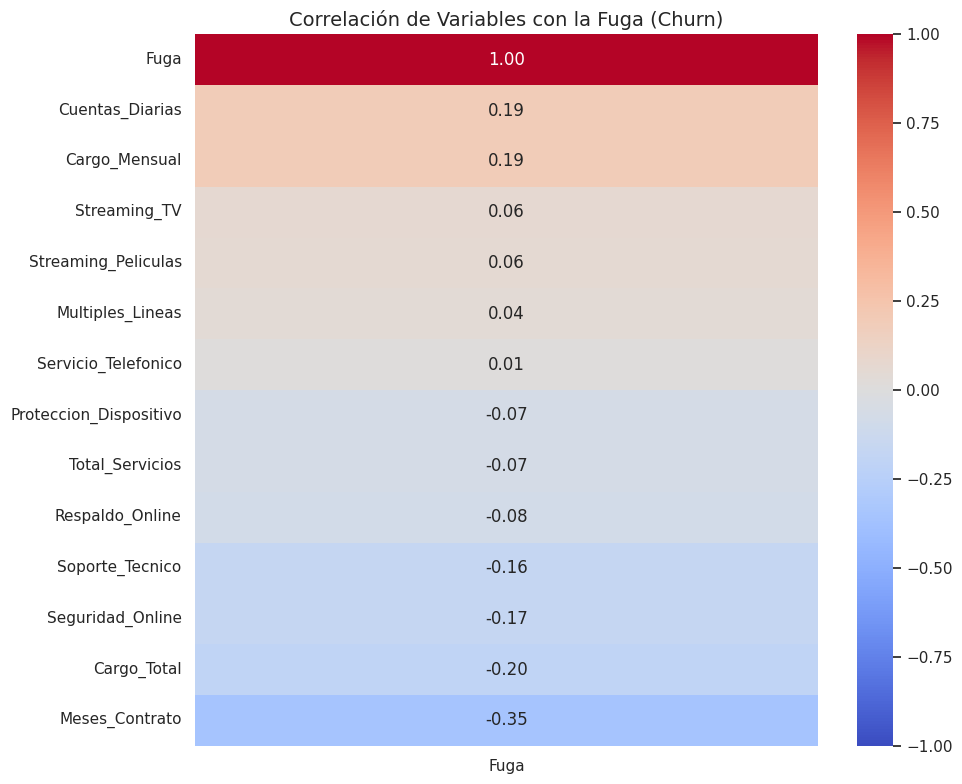

/tmp/ipython-input-488/3525721567.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Total_Servicios', y='Fuga', palette='viridis')


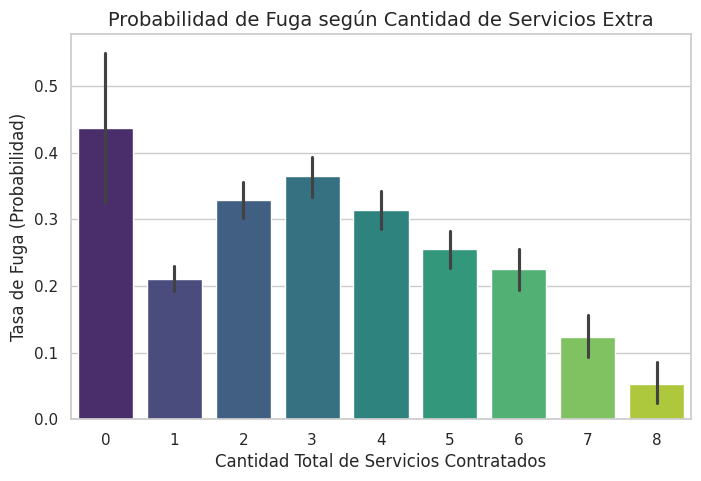

In [16]:
# 1. Crear la columna "Total_Servicios"
# Sumamos todos los servicios binarios que el cliente ha contratado (1=Sí, 0=No)
lista_servicios = ['Servicio_Telefonico', 'Multiples_Lineas', 'Seguridad_Online',
                   'Respaldo_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico',
                   'Streaming_TV', 'Streaming_Peliculas']

df['Total_Servicios'] = df[lista_servicios].sum(axis=1)

# 2. Calcular la Matriz de Correlación
# Solo seleccionamos las columnas numéricas y calculamos cómo se relacionan con 'Fuga'
variables_corr = ['Fuga', 'Meses_Contrato', 'Cargo_Mensual', 'Cargo_Total',
                  'Cuentas_Diarias', 'Total_Servicios'] + lista_servicios

matriz_corr = df[variables_corr].corr()

# 3. Visualizar la correlación con un Mapa de Calor (Heatmap)
plt.figure(figsize=(10, 8))
# Ordenamos para ver qué afecta más a la Fuga de mayor a menor
sns.heatmap(matriz_corr[['Fuga']].sort_values(by='Fuga', ascending=False),
            annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlación de Variables con la Fuga (Churn)', fontsize=14)
plt.tight_layout()
plt.show()

# 4. Visualizar la relación entre Cantidad de Servicios y Fuga
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Total_Servicios', y='Fuga', palette='viridis')
plt.title('Probabilidad de Fuga según Cantidad de Servicios Extra', fontsize=14)
plt.xlabel('Cantidad Total de Servicios Contratados')
plt.ylabel('Tasa de Fuga (Probabilidad)')
plt.show()

Si revisamos los números que arrojó Python, aquí están los descubrimientos de oro que responden directamente a tus hipótesis:

La relación entre la Cuenta Diaria y la Evasión (Correlación Positiva de 0.19):

¿Qué significa? Al ser una correlación positiva (+), significa que a medida que sube la Cuenta Diaria, sube la probabilidad de fuga.

El Insight: Los servicios caros están ahuyentando a los clientes. Cada dólar extra en la cuenta diaria aumenta el riesgo, lo que refuerza nuestra teoría anterior: el cliente no está percibiendo que el servicio valga lo que cuesta.

La cantidad de servicios y la evasión (El efecto ancla):

Si miras el gráfico de barras (Tasa de Fuga vs Total de Servicios), verás algo fascinante: los clientes con 0 o 1 servicio tienen una tasa de fuga altísima. Pero a medida que acumulan 3, 4 o 5 servicios, la barra de fuga comienza a caer en picada.

El Insight: "El Efecto Ecosistema". Cuando un cliente contrata múltiples servicios (Internet + Soporte + Respaldo), se ancla a la empresa. Le da más "pereza" cancelar todo su ecosistema digital para irse a la competencia.

La Antigüedad: Tu mejor defensa (Correlación Negativa de -0.35):

Es la variable con mayor correlación negativa. Esto matemáticamente confirma que a mayor tiempo (Meses_Contrato), menor es el Churn.V